In [50]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd

%matplotlib inline

import numpy as np

from scipy.optimize import curve_fit, minimize

darks=['#ff7200', '#984ea3', '#7fc97f', '#3a80b0', '#e261b0']
pastels=['#fed9a6','#decbe4','#ccebc5', '#b3cde3', '#f4cae4']

In [51]:
def fit_fxn(x, B_o, K):
    # B_o is initial # competent cells
    # K is ratio of k1 (competent cells-> non-competent cells) and k2 (competent cell -> transformed cells)
    # x is [DNA]
    return B_o*(x/(K+x))


def test_fit_fxn(x, B_o, K):
    # B_o is initial # competent cells
    # K is ratio of k1 (competent cells-> non-competent cells) and k2 (competent cell -> transformed cells)
    # x is [DNA]
    # describes function is data is log-transformed
    return np.log(B_o*(np.exp(x)/(K+np.exp(x))))

def test_l2_cost_fxn(params, x, y):
    C=params[0]
    K=params[1]
    ypred=test_fit_fxn(x, C, K)
    err=sum(((y-ypred)/y)**2)
    return(err)



In [52]:
#import data for fig 2b/ ED
df=pd.read_csv('counts_fig2b.csv')
df.head()



,number,sequence,media,induction,strain,TE_1,TE_2,TE_3,TE_4,TE_aver,...,trans_1,trans_2,trans_3,trans_4,trans_aver,trans_SD,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,A,LB,False,1A751,NaN,4.550000e-06,9.440000e-07,4.830000e-07,1.990000e-06,...,1700.0,5000,850.0,700.0,2062.50,2007.226528,NaN,NaN,NaN,NaN
1,2,C,LB,False,1A751,NaN,5.310000e-07,3.410000e-07,8.520000e-07,5.750000e-07,...,1500.0,850,375.0,1150.0,968.75,476.696532,NaN,NaN,NaN,NaN
2,3,D,LB,False,1A751,NaN,1.020000e-06,6.390000e-07,0.000000e+00,5.540000e-07,...,2000.0,1175,575.0,0.0,937.50,855.496932,NaN,NaN,NaN,NaN
3,4,E,LB,False,1A751,8.000000e-07,1.500000e-06,3.410000e-07,NaN,8.800000e-07,...,1500.0,900,375.0,NaN,925.00,562.916512,NaN,NaN,NaN,NaN
4,5,F,LB,False,1A751,3.080000e-06,2.000000e-06,5.190000e-07,NaN,1.870000e-06,...,4000.0,1400,675.0,NaN,2025.00,1748.392118,NaN,NaN,NaN,NaN


In [66]:
#USE THIS FOR FIGURE 2
baseline=1e-8

def plot_TE(ax, position, df, sequence, color, edgecolor):
    ms=8
    mew=2
    mfc=edgecolor#'black'
    mc='black'
    offset=.17
    w=.58
    ew=3
    capsize=6
    ax.bar(position, df[df['sequence']==sequence]['TE_aver'], width=w, color=color, edgecolor=edgecolor, linewidth=ew)
    ax.plot(position-offset, [baseline if x==0 else x for x in df[df['sequence']==sequence]['TE_1']], 
            'o', markersize=ms,color=mc, mew=mew, mfc=mfc)
    ax.plot(position+offset, [baseline if x==0 else x for x in df[df['sequence']==sequence]['TE_2']],
            'o', markersize=ms, color=mc, mew=mew, mfc=mfc)
    ax.plot(position, [baseline if x==0 else x for x in df[df['sequence']==sequence]['TE_3']],
            'o', markersize=ms, color=mc, mew=mew, mfc=mfc)
    ax.plot(position-offset, [baseline if x==0 else x for x in df[df['sequence']==sequence]['TE_4']], 
        'o', markersize=ms,color=mc, mew=mew, mfc=mfc)

media='LB'
df2=df[df['media']==media]

w=.8
x=5.8

fig, ax=plt.subplots(figsize=(14,6), dpi=300)
plot_TE(ax,x*w*np.array([0,1,2,3]), df2, 'A', pastels[3], darks[3])
plot_TE(ax,x*w*np.array([0,1,2,3])+w, df2, 'C', pastels[0], darks[0])
plot_TE(ax,x*w*np.array([0,1,2,3])+2*w, df2, 'D', pastels[1], darks[1])
plot_TE(ax,x*w*np.array([0,1,2,3])+3*w, df2, 'E', pastels[2], darks[2])
plot_TE(ax,x*w*np.array([0,1,2,3])+4*w, df2, 'F', pastels[4], darks[4])
ax.plot([-w,x*w*5+4*w+w], [2e-8, 2e-8], '-', color='white', linewidth=4)
ax.plot([-w, -w], [1.9e-8, 2.2e-8], '-', color='white', linewidth=5, zorder=7, clip_on=False)
ax.plot([-w-w/10, -w+w/10], [ 2.11e-8, 2.37e-8], '-', color='black', linewidth=4, zorder=8, clip_on=False)
ax.plot([-w-w/10, -w+w/10], [1.58e-8, 1.78e-8], '-', color='black', linewidth=4, zorder=9, clip_on=False)

ax.set_yscale('log')
xticks=np.concatenate((w*np.array([0,1,2,3,4]),
                      w*np.array([0,1,2,3,4])+x*w, 
                      w*np.array([0,1,2,3,4])+2*x*w, 
                      w*np.array([0,1,2,3,4])+3*x*w))
ax.set_xticks(xticks)
ax.set_xticklabels(['1', '2', '3', '4', '5', '1', '2', '3', '4', '5','1', '2', '3', '4', '5',
                    '1', '2', '3', '4', '5'])

ax.set_xbound(lower=-w, upper=x*w*3+5*w)
ax.set_ybound(lower=baseline, upper=1e-1)
ax.set_yticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]) #change manually
ax.set_yticklabels(['0', '10  ', '10  ', '10  ', '10  ', '10  ', '10  ', '10  '])
ax.tick_params(which='major', direction='out', length=15, width=3)
ax.tick_params(which='minor', direction='out', length=0, width=3)
ax.tick_params(axis='both', which='major', labelsize=40)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color('black')
    
for tick in ax.get_xticklabels():
    tick.set_fontname('Arial')
for tick in ax.get_yticklabels():
    tick.set_fontname('Arial')

ax.grid(False)

plt.show()
plt.tight_layout()
# fig.savefig('TE_'+media+'.pdf', bbox_inches='tight')
plt.close()



KeyError: 'media'

In [54]:
#import data for fig 2c
df=pd.read_csv('counts_fig2c.csv')
df.head()
#A=1, C=2, D=3, E=4, F=5


,sequence,sample,DNA (pM),replicate 1,replicate 2,replicate 3,replicate 4,replicate 5,mean,sd
0,A,A1,941.929261,0.012700,NaN,NaN,0.0388,0.0289,0.026800,0.013200
1,A,A2,94.192926,0.005570,NaN,0.007330,0.0135,NaN,0.008800,0.004160
2,A,A3,9.419293,0.000464,0.000608,0.000427,NaN,NaN,0.000500,0.000096
3,A,A4,0.941929,0.000011,0.000115,0.000092,NaN,NaN,0.000073,0.000054
4,A,A5,0.094193,0.000003,0.000008,0.000009,NaN,NaN,0.000007,0.000003


 final_simplex: (array([[4.91684887e-02, 6.10771261e+02],
       [4.91684929e-02, 6.10771326e+02],
       [4.91684896e-02, 6.10771296e+02]]), array([0.82051138, 0.82051138, 0.82051138]))
           fun: 0.8205113750481859
       message: 'Optimization terminated successfully.'
          nfev: 124
           nit: 63
        status: 0
       success: True
             x: array([4.91684887e-02, 6.10771261e+02])


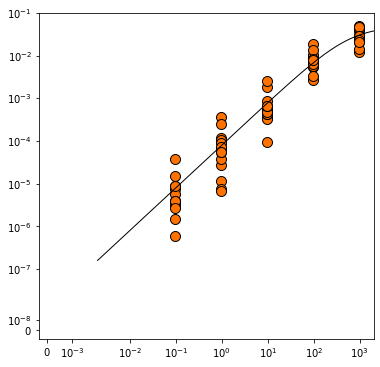

75


C:\Users\Angelina\Anaconda3\envs\cf\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


Cboot
mean
0.05085651932740723
median
0.049494396195070525
sd
0.010756557022682089
95% CI
-0.015640900490269838
0.026462603702930368
IQR
-0.0061396289695484635
0.007102102211080048
Kboot
mean
643.8564950767833
median
611.2468481514397
sd
186.46678626473368
95% CI
-237.9436984094557
482.460619071212
IQR
-100.89065704130581
129.071713365822


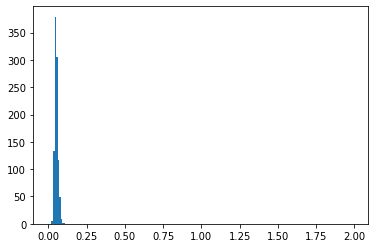

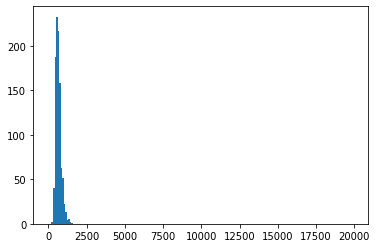

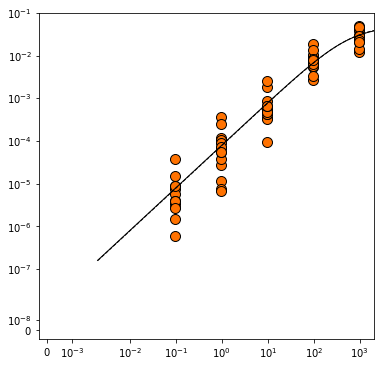

In [63]:
# code to fit data shown in fig 2c

p0=[.09, 1800]

#gather all data (excluding 0's)
x_array=[]
y_array=[]
for rep in ['replicate 1', 'replicate 2', 'replicate 3', 'replicate 4', 'replicate 5']:
    x=np.array(df['DNA (pM)'])
    y=np.array(df[rep])
    for x_val, y_val in zip(x, y):
        if (y_val>0) and (x_val>0):
            x_array.append(x_val)
            y_array.append(y_val)
#log transform
xlog=np.log(x_array)
ylog=np.log(y_array)

#minimize log transformed l2 cost fxn (in log-transformed space)
output=minimize(test_l2_cost_fxn, p0, args=(xlog, ylog), method='Nelder-mead')
params=output.x
print(output) #prints output when directly fitting data

#plot fit
fig, ax=plt.subplots(figsize=(6,6))#, dpi=300)
ms=10
color=darks[0]
ax.plot(x_array, y_array, 'o', color=color, mec='black', markersize=ms, linewidth=2) #plot all points
x=10**np.linspace(-2.7, 3.5, 300)
ax.plot(x, fit_fxn(x, *params), '-', color='black', lw=1) #plot fit
ax.set_xscale('symlog', linthreshx=2e-3, lw=10)
ax.set_yscale('symlog', linthreshy=5e-8, lw=10)
ax.set_ylim(-1e-8, 1e-1)
ax.set_xlim(-3e-4, 2e3)
plt.show()
plt.close()
    

    
#bootstrapping to estimate error
print(len(y_array))
Cboot=[]
Kboot=[]
for no in range(1000): #perform 1000 iterations of bootstrapping
#     print(no)
    bootx=[]
    booty=[]
    for i in range(len(y_array)): #randomly sample data
        idx=np.random.randint(len(y_array))
        bootx.append(x_array[idx])
        booty.append(y_array[idx])
    #log transforms bootx and booty
    bootxlog=np.log(bootx)
    bootylog=np.log(booty)
    
    #minimize l2 for log transformed 
    output=minimize(test_l2_cost_fxn, p0, args=(bootxlog, bootylog), method='Nelder-mead')
    bootparams=output.x

    #only save output if fitting is successful
    if output.success==True:
        Cboot.append(bootparams[0])
        Kboot.append(bootparams[1])

#prints out bootstrapping parameters
print('Cboot')
print('mean')
print(np.mean(Cboot))
print('median')
print(np.median(Cboot))
print('sd')
print(np.std(Cboot))
print('95% CI')
print(np.percentile(Cboot, 2.5)-np.percentile(Cboot, 50))
print(np.percentile(Cboot, 97.5)-np.percentile(Cboot, 50))
print('IQR')
print(np.percentile(Cboot, 25)-np.median(Cboot))
print(np.percentile(Cboot, 75)-np.median(Cboot))

print('Kboot')
print('mean')
print(np.mean(Kboot))
print('median')
print(np.median(Kboot))
print('sd')
print(np.std(Kboot))
print('95% CI')
print(np.percentile(Kboot, 2.5)-np.percentile(Kboot, 50))
print(np.percentile(Kboot, 97.5)-np.percentile(Kboot, 50))
print('IQR')
print(np.percentile(Kboot, 25)-np.median(Kboot))
print(np.percentile(Kboot, 75)-np.median(Kboot))

#histogram of C values from bootstrapping
fig, ax=plt.subplots()
ax.hist(Cboot, bins=np.arange(0, 2, .01))
#histogram of K values from bootstrapping
fig, ax=plt.subplots()
ax.hist(Kboot, bins=np.arange(0, 20000, 100))
#compare fit to bootstrapping results
fig, ax=plt.subplots(figsize=(6,6))#, dpi=300)
ax.plot(x_array, y_array, 'o', color=color, mec='black', markersize=ms, linewidth=2) #plot all points
ax.plot(x, fit_fxn(x, *params), '-', color='black', lw=1) #plot manual fit
ax.plot(x, fit_fxn(x, np.mean(Cboot), np.mean(Kboot)), '--', color='black', lw=1) #plot manual fit

ax.set_xscale('symlog', linthreshx=2e-3, lw=10)
ax.set_yscale('symlog', linthreshy=5e-8, lw=10)
ax.set_ylim(-1e-8, 1e-1)
ax.set_xlim(-3e-4, 2e3)

plt.show()
plt.close()

    

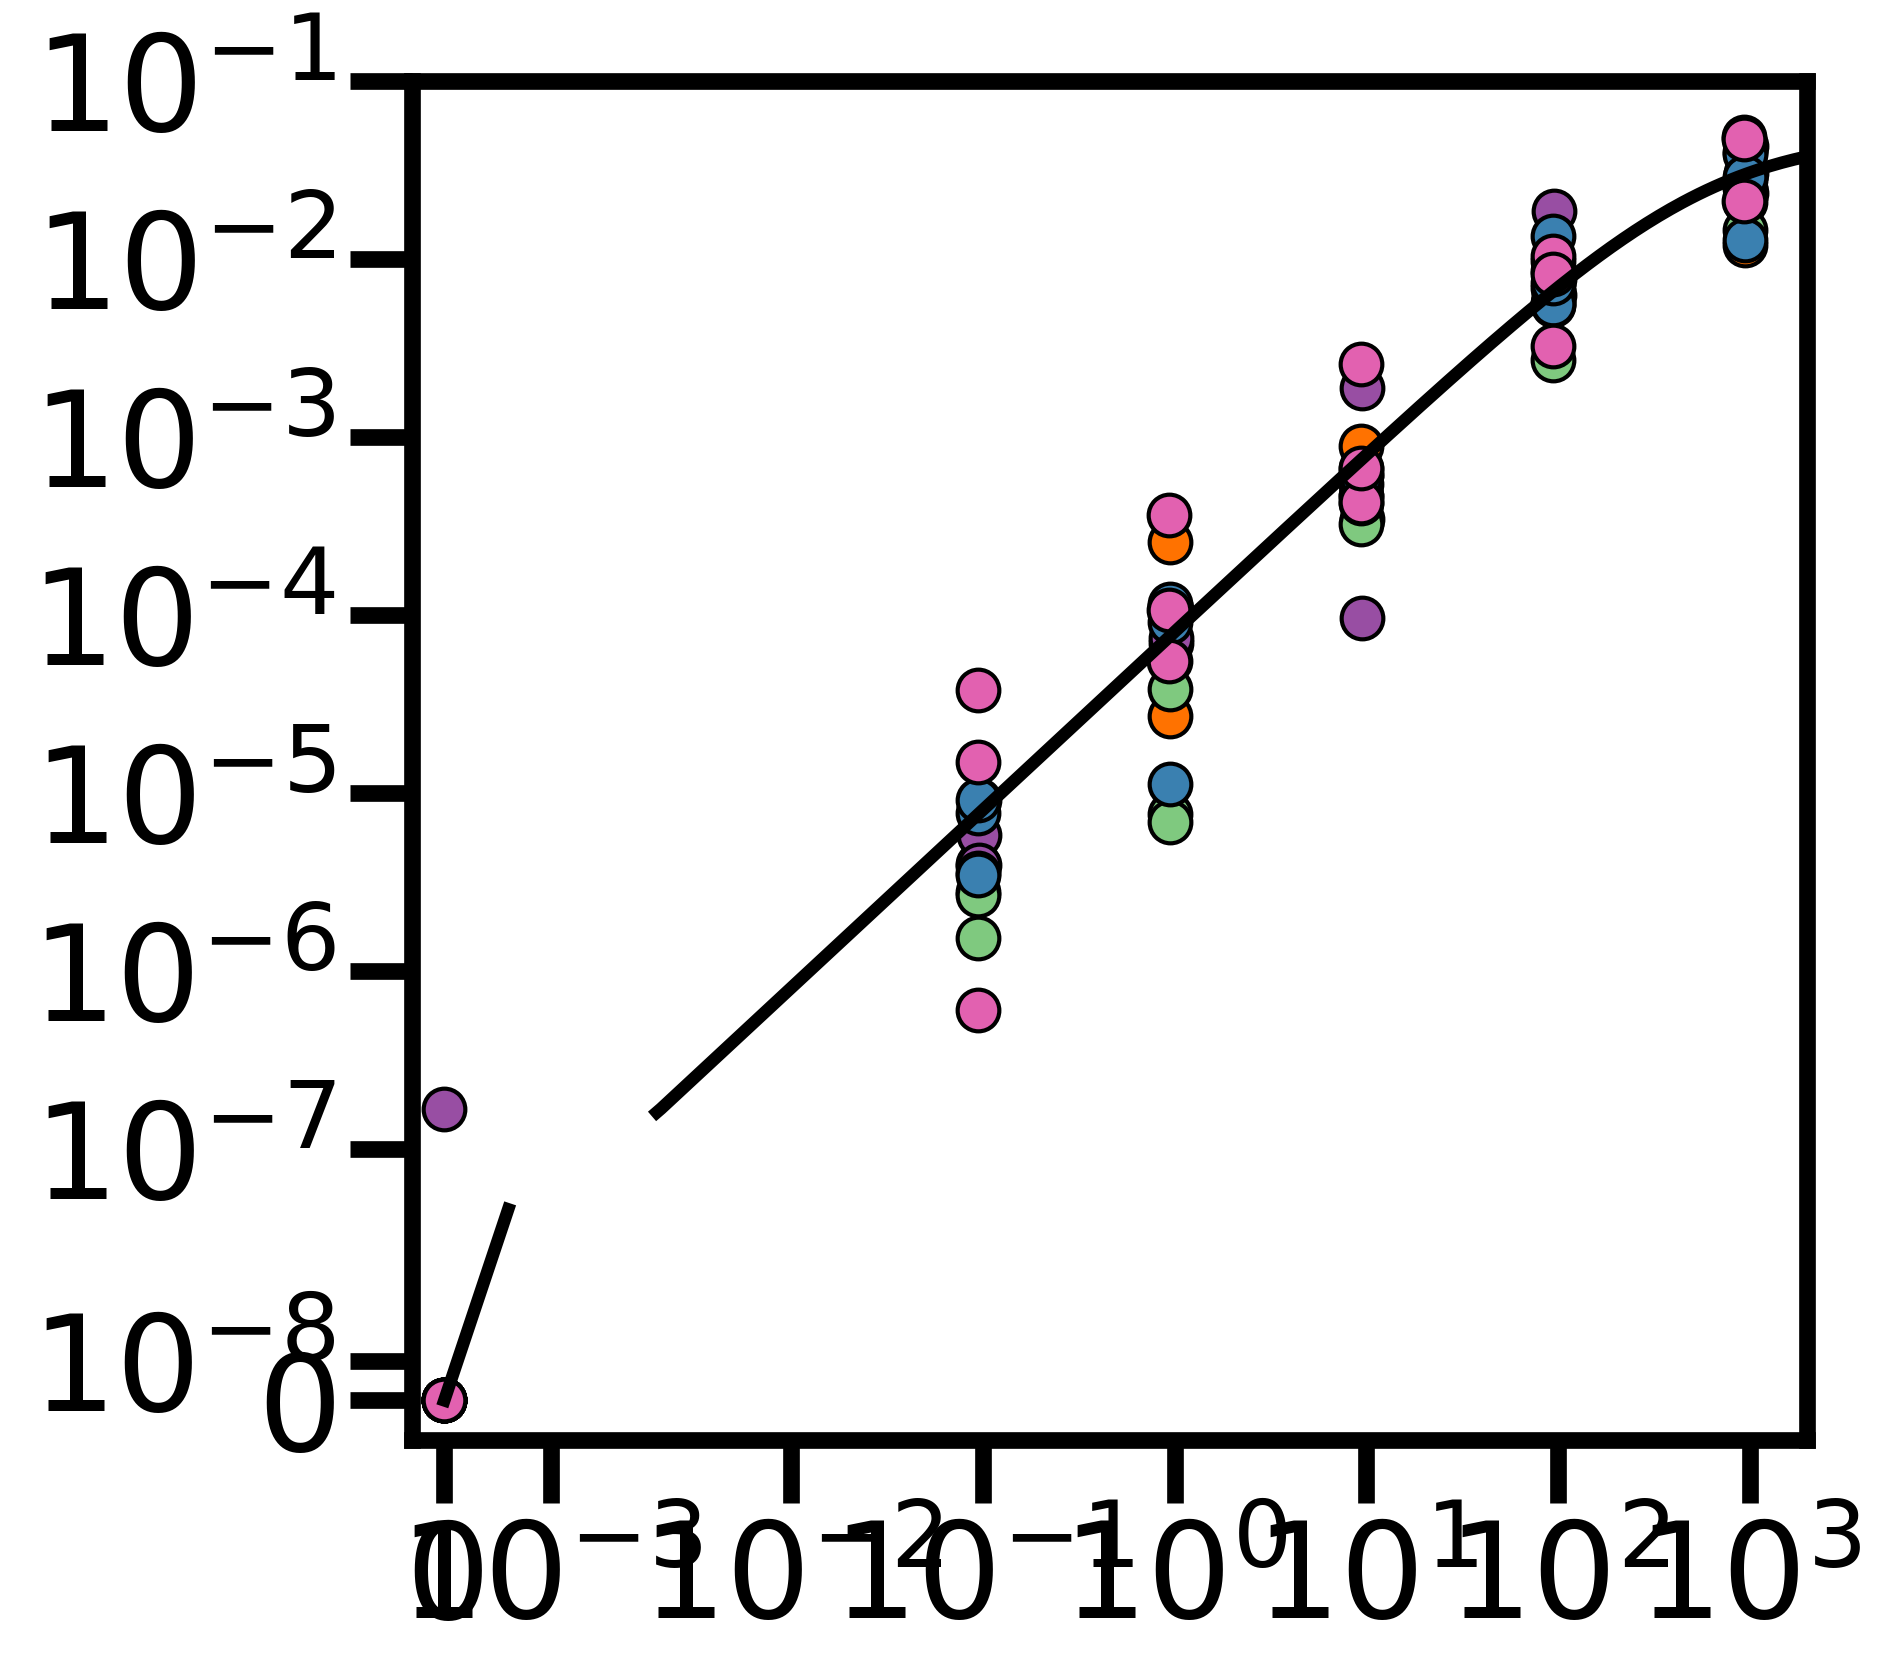

In [64]:
#generates plot shown in 2c (based on fitting in previous cell)

params=[4.91684887e-02, 6.10771261e+02]
    
fig, ax=plt.subplots(figsize=(6,6), dpi=300)
ms=10

for seq, color, ms in zip(['C', 'D', 'E', 'A', 'F'], darks, [10,10, 10, 10, 10]):
    DNA_vals=np.array(df[df['sequence']==seq]['DNA (pM)'])
    TE_vals1=np.array(df[df['sequence']==seq]['replicate 1'])
    TE_vals2=np.array(df[df['sequence']==seq]['replicate 2'])
    TE_vals3=np.array(df[df['sequence']==seq]['replicate 3'])
    TE_vals4=np.array(df[df['sequence']==seq]['replicate 4'])
    TE_vals5=np.array(df[df['sequence']==seq]['replicate 5'])
    
    ax.plot(DNA_vals, TE_vals1, 'o', color=color, mec='black', markersize=ms, linewidth=2)#, alpha=.5)
    ax.plot(DNA_vals, TE_vals2, 'o', color=color, mec='black', markersize=ms, linewidth=2)#, alpha=.5)
    ax.plot(DNA_vals, TE_vals3, 'o', color=color, mec='black', markersize=ms, linewidth=2)#, alpha=.5)
    ax.plot(DNA_vals, TE_vals4, 'o', color=color, mec='black', markersize=ms, linewidth=2)#, alpha=.5)
    ax.plot(DNA_vals, TE_vals5, 'o', color=color, mec='black', markersize=ms, linewidth=2)#, alpha=.5)

x=10**np.linspace(-2.7, 3.5, 300)
ax.plot(x, fit_fxn(x, *params), '-', color='black', lw=3)
ax.set_xticks([0, 1e-1, 1e0, 1e1, 1e2, 1e3], minor=False)
ax.set_yticks([0, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], minor=False)

ax.set_xscale('symlog', linthreshx=2e-3, lw=10)
ax.set_yscale('symlog', linthreshy=5e-8, lw=10)
ax.set_ylim(-1e-8, 1e-1)
ax.set_xlim(-3e-4, 2e3)

x2=np.linspace(0, 6e-4, 20)
ax.plot(x2, fit_fxn(x2, *params), color='black', lw=3)

ax.tick_params(which='major', direction='out', length=15, width=4)
ax.tick_params(which='minor', direction='out', length=0, width=1)
ax.tick_params(axis='both', which='major', labelsize=32)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(4)
    ax.spines[axis].set_color('black')

plt.show()
plt.tight_layout()
# fig.savefig('newfit_all_fits.pdf', bbox_inches='tight')
plt.close()
    

[941.9292608, 94.19292608, 9.419292608, 0.941929261, 0.094192926, 9.419292608, 0.941929261, 0.094192926, 94.19292608, 9.419292608, 0.941929261, 0.094192926, 941.9292608, 94.19292608, 941.9292608]
[0.0127, 0.00557, 0.00046399999999999995, 1.13e-05, 3.45e-06, 0.000608, 0.00011499999999999999, 7.69e-06, 0.00733, 0.00042699999999999997, 9.17e-05, 9.09e-06, 0.0388, 0.0135, 0.0289]
[ 6.84793018  4.54534508  2.24275999 -0.0598251  -2.3624102   2.24275999
 -0.0598251  -2.3624102   4.54534508  2.24275999 -0.0598251  -2.3624102
  6.84793018  4.54534508  6.84793018]
[ -4.36615329  -5.19036023  -7.67562601 -11.39070783 -12.57713633
  -7.40533568  -9.07057843 -11.77558977  -4.91577976  -7.75872654
  -9.29698818 -11.60833565  -3.24933503  -4.30506559  -3.54391368]
 final_simplex: (array([[4.47329622e-02, 5.59485038e+02],
       [4.47329666e-02, 5.59485111e+02],
       [4.47329648e-02, 5.59485061e+02]]), array([0.11785676, 0.11785676, 0.11785676]))
           fun: 0.11785676482829854
       message: 

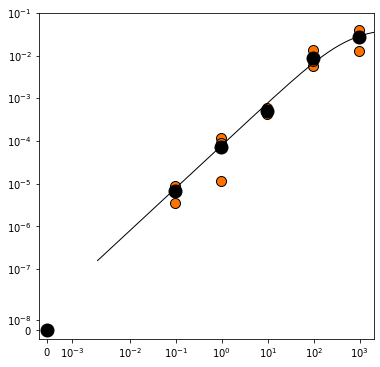

15


C:\Users\Angelina\Anaconda3\envs\cf\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


Cboot
mean
0.05169118902936123
median
0.04718930113751742
sd
0.028935028763268103
95% CI
-0.028824976651018235
0.06303275309876148
IQR
-0.012693738014508744
0.01404015972316816
Kboot
mean
699.7220540592499
median
600.3596460730648
sd
516.146962736041
95% CI
-385.51793638294953
1131.8699123349882
IQR
-191.37908375789362
227.3012102885366


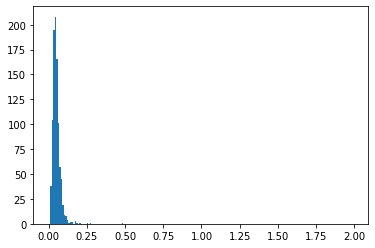

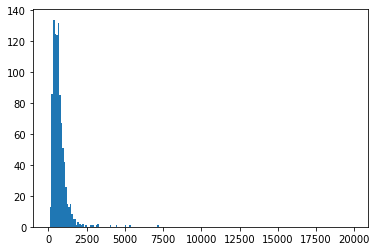

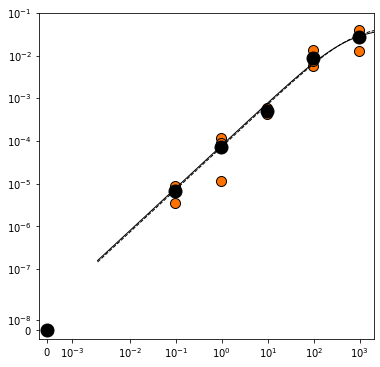

In [65]:
#fits to data for individual sequences and estimates error (to compare to overall fit, fig 2c)

seq='A' #for SEQ1: change to 'C', 'D', 'E', 'F' for SEQ2, SEQ3, SEQ4, and SEQ5 respectively
p0=[.09, 1800]

x_array=[]
y_array=[]
for rep in ['replicate 1', 'replicate 2', 'replicate 3', 'replicate 4', 'replicate 5']:
    x=np.array(df.loc[df['sequence']==seq, 'DNA (pM)'])
    y=np.array(df.loc[df['sequence']==seq, rep])
    for x_val, y_val in zip(x, y):
        if (y_val>0) and (x_val>0):
            x_array.append(x_val)
            y_array.append(y_val)
print(x_array)
print(y_array)
#     x_array=np.array(df.loc[df['sequence']==seq, 'DNA (pM)'])
#     y_array=np.array(df.loc[df['sequence']==seq, 'mean'])

#     x_array=[x for x, y in zip(x_array, y_array) if x>0]
#     y_array=[y for x, y in zip(x_array, y_array) if x>0]

xlog=np.log(x_array)
ylog=np.log(y_array)

print(xlog)
print(ylog)

#minimize log transformed l2 cost fxn
output=minimize(test_l2_cost_fxn, p0, args=(xlog, ylog), method='Nelder-mead')
params=output.x
print(output)

fig, ax=plt.subplots(figsize=(6,6))#, dpi=300)
ms=10
color=darks[0]

ax.plot(x_array, y_array, 'o', color=color, mec='black', markersize=ms, linewidth=2) #plot all points

x_mean=np.array(df.loc[df['sequence']==seq, 'DNA (pM)'])
y_mean=np.array(df.loc[df['sequence']==seq, 'mean'])
ax.plot(x_mean, y_mean, 'o', ms=ms*1.3, color='black') #plot all means

x=10**np.linspace(-2.7, 3.5, 300)
ax.plot(x, fit_fxn(x, *params), '-', color='black', lw=1) #plot l1 fit

ax.set_xscale('symlog', linthreshx=2e-3, lw=10)
ax.set_yscale('symlog', linthreshy=5e-8, lw=10)
ax.set_ylim(-1e-8, 1e-1)
ax.set_xlim(-3e-4, 2e3)

plt.show()
plt.close()
    

    
#bootstrapping
print(len(y_array))
Cboot=[]
Kboot=[]
for no in range(1000):
    bootx=[]
    booty=[]
    for i in range(len(y_array)):
        idx=np.random.randint(len(y_array))
        bootx.append(x_array[idx])
        booty.append(y_array[idx])
    #log transforms bootx and booty
    bootxlog=np.log(bootx)
    bootylog=np.log(booty)
    #minimize l2 for log transformed 
    output=minimize(test_l2_cost_fxn, p0, args=(bootxlog, bootylog), method='Nelder-mead')
    bootparams=output.x
#     print(output)
    
    if output.success==True:
        Cboot.append(bootparams[0])
        Kboot.append(bootparams[1])

# print(Cboot)
# print(Kboot)
print('Cboot')
print('mean')
print(np.mean(Cboot))
print('median')
print(np.median(Cboot))
print('sd')
print(np.std(Cboot))
print('95% CI')
print(np.percentile(Cboot, 2.5)-np.percentile(Cboot, 50))
print(np.percentile(Cboot, 97.5)-np.percentile(Cboot, 50))
print('IQR')
print(np.percentile(Cboot, 25)-np.median(Cboot))
print(np.percentile(Cboot, 75)-np.median(Cboot))

print('Kboot')
print('mean')
print(np.mean(Kboot))
print('median')
print(np.median(Kboot))
print('sd')
print(np.std(Kboot))
print('95% CI')
print(np.percentile(Kboot, 2.5)-np.percentile(Kboot, 50))
print(np.percentile(Kboot, 97.5)-np.percentile(Kboot, 50))
print('IQR')
print(np.percentile(Kboot, 25)-np.median(Kboot))
print(np.percentile(Kboot, 75)-np.median(Kboot))

fig, ax=plt.subplots()
ax.hist(Cboot, bins=np.arange(0, 2, .01))

fig, ax=plt.subplots()
ax.hist(Kboot, bins=np.arange(0, 20000, 100))

fig, ax=plt.subplots(figsize=(6,6))#, dpi=300)
ax.plot(x_array, y_array, 'o', color=color, mec='black', markersize=ms, linewidth=2) #plot all points
ax.plot(x_mean, y_mean, 'o', ms=ms*1.3, color='black') #plot all means
ax.plot(x, fit_fxn(x, *params), '-', color='black', lw=1) #plot  fit
ax.plot(x, fit_fxn(x, np.mean(Cboot), np.mean(Kboot)), '--', color='black', lw=1) #plot manual fit

ax.set_xscale('symlog', linthreshx=2e-3, lw=10)
ax.set_yscale('symlog', linthreshy=5e-8, lw=10)
ax.set_ylim(-1e-8, 1e-1)
ax.set_xlim(-3e-4, 2e3)

plt.show()
plt.close()

    

In [67]:
df=pd.read_csv('counts_fig2d.csv')
df.head()

,sample,pM DNA,tf1,tf2,tf3,tf4,tf5,average,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,pAN422,1000.0,0.023333,0.045161,0.012381,0.008700,0.012473,0.020409,NaN,NaN,NaN
1,pAN422,100.0,0.005053,0.013269,0.002812,0.018100,0.001709,0.008188,NaN,NaN,NaN
2,pAN422,10.0,0.000250,0.001099,0.000430,0.004380,0.000248,0.001280,NaN,NaN,NaN
3,pAN422,1.0,0.000030,0.000091,0.000023,0.000197,0.000014,0.000071,NaN,NaN,NaN
4,pAN422,0.1,0.000005,0.000007,0.000002,0.000023,0.000002,0.000008,NaN,NaN,NaN


[1000.0, 100.0, 10.0, 1.0, 0.1, 1000.0, 100.0, 10.0, 1.0, 0.1, 1000.0, 100.0, 10.0, 1.0, 0.1, 1000.0, 100.0, 10.0, 1.0, 0.1, 1000.0, 100.0, 10.0, 1.0, 0.1]
[0.023333332999999998, 0.0050526320000000005, 0.00025, 3.03448e-05, 4.5e-06, 0.04516129, 0.013269231000000001, 0.001098765, 9.069770000000001e-05, 7.346939999999999e-06, 0.012380951999999999, 0.0028125, 0.000430435, 2.33333e-05, 1.8181799999999999e-06, 0.0087, 0.0181, 0.004379999999999999, 0.000197, 2.26e-05, 0.012473118, 0.0017093020000000002, 0.000247525, 1.41593e-05, 1.7829499999999998e-06]
[ 6.90775528  4.60517019  2.30258509  0.         -2.30258509  6.90775528
  4.60517019  2.30258509  0.         -2.30258509  6.90775528  4.60517019
  2.30258509  0.         -2.30258509  6.90775528  4.60517019  2.30258509
  0.         -2.30258509  6.90775528  4.60517019  2.30258509  0.
 -2.30258509]
[ -3.75787234  -5.28784598  -8.29404964 -10.40288539 -12.31143316
  -3.09751498  -4.32230738  -6.81356846  -9.30797856 -11.82122666
  -4.39159612  -5

C:\Users\Angelina\Anaconda3\envs\cf\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


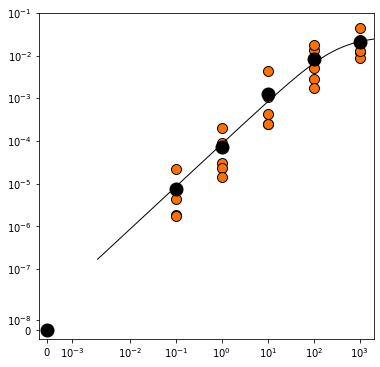

25
Cboot
mean
0.030787759195195087
median
0.03198701579071157
sd
0.00887689059586182
95% CI
-0.015351054906543215
0.010406366703835448
IQR
-0.008749511148240269
0.005976694586519976
Kboot
mean
396.76950637090954
median
337.50082751209766
sd
203.3854871767343
95% CI
-215.6211154272621
421.7397537734465
IQR
-88.1101797711074
204.01388333866976


C:\Users\Angelina\Anaconda3\envs\cf\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


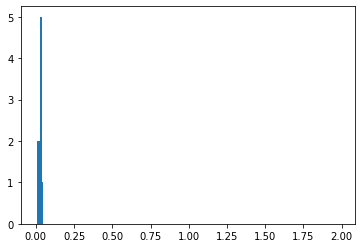

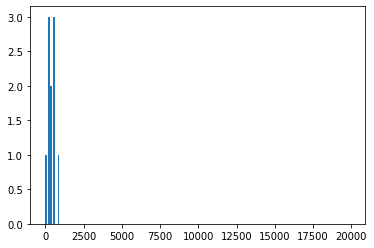

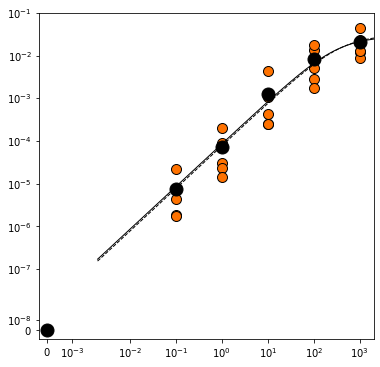

In [68]:
#fit to + plasmid SEQ1 data

p0=[.09, 1800]

sample='pAN422'


x_array=[]
y_array=[]
for rep in ['tf1', 'tf2', 'tf3', 'tf4', 'tf5']:
    x=np.array(df.loc[df['sample']==sample, 'pM DNA'])
    y=np.array(df.loc[df['sample']==sample, rep])
    for x_val, y_val in zip(x, y):
        if (y_val>0) and (x_val>0):
            x_array.append(x_val)
            y_array.append(y_val)
print(x_array)
print(y_array)


xlog=np.log(x_array)
ylog=np.log(y_array)

print(xlog)
print(ylog)

#minimize log transformed l2 cost fxn
output=minimize(test_l2_cost_fxn, p0, args=(xlog, ylog), method='Nelder-mead')
params=output.x
print(output)

fig, ax=plt.subplots(figsize=(6,6))#, dpi=300)
ms=10
color=darks[0]

ax.plot(x_array, y_array, 'o', color=color, mec='black', markersize=ms, linewidth=2) #plot all points
x_mean=np.array(df.loc[df['sample']==sample, 'pM DNA'])
y_mean=np.array(df.loc[df['sample']==sample, 'average'])
ax.plot(x_mean, y_mean, 'o', ms=ms*1.3, color='black') #plot all means

x=10**np.linspace(-2.7, 3.5, 300)
ax.plot(x, fit_fxn(x, *params), '-', color='black', lw=1) #plot l1 fit

ax.set_xscale('symlog', linthreshx=2e-3, lw=10)
ax.set_yscale('symlog', linthreshy=5e-8, lw=10)
ax.set_ylim(-1e-8, 1e-1)
ax.set_xlim(-3e-4, 2e3)

plt.show()
plt.close()
    

    
#bootstrapping
print(len(y_array))
Cboot=[]
Kboot=[]
for no in range(10):
    bootx=[]
    booty=[]
    for i in range(len(y_array)):
        idx=np.random.randint(len(y_array))
        bootx.append(x_array[idx])
        booty.append(y_array[idx])
    #log transforms bootx and booty
    bootxlog=np.log(bootx)
    bootylog=np.log(booty)
    #minimize l2 for log transformed 
    output=minimize(test_l2_cost_fxn, p0, args=(bootxlog, bootylog), method='Nelder-mead')
    bootparams=output.x
#     print(output)
    
    if output.success==True:
        Cboot.append(bootparams[0])
        Kboot.append(bootparams[1])

# print(Cboot)
# print(Kboot)
print('Cboot')
print('mean')
print(np.mean(Cboot))
print('median')
print(np.median(Cboot))
print('sd')
print(np.std(Cboot))
print('95% CI')
print(np.percentile(Cboot, 2.5)-np.percentile(Cboot, 50))
print(np.percentile(Cboot, 97.5)-np.percentile(Cboot, 50))
print('IQR')
print(np.percentile(Cboot, 25)-np.median(Cboot))
print(np.percentile(Cboot, 75)-np.median(Cboot))

print('Kboot')
print('mean')
print(np.mean(Kboot))
print('median')
print(np.median(Kboot))
print('sd')
print(np.std(Kboot))
print('95% CI')
print(np.percentile(Kboot, 2.5)-np.percentile(Kboot, 50))
print(np.percentile(Kboot, 97.5)-np.percentile(Kboot, 50))
print('IQR')
print(np.percentile(Kboot, 25)-np.median(Kboot))
print(np.percentile(Kboot, 75)-np.median(Kboot))

fig, ax=plt.subplots()
ax.hist(Cboot, bins=np.arange(0, 2, .01))

fig, ax=plt.subplots()
ax.hist(Kboot, bins=np.arange(0, 20000, 100))

fig, ax=plt.subplots(figsize=(6,6))#, dpi=300)
ax.plot(x_array, y_array, 'o', color=color, mec='black', markersize=ms, linewidth=2) #plot all points
ax.plot(x_mean, y_mean, 'o', ms=ms*1.3, color='black') #plot all means
ax.plot(x, fit_fxn(x, *params), '-', color='black', lw=1) #plot manual fit
ax.plot(x, fit_fxn(x, np.mean(Cboot), np.mean(Kboot)), '--', color='black', lw=1) #plot manual fit

ax.set_xscale('symlog', linthreshx=2e-3, lw=10)
ax.set_yscale('symlog', linthreshy=5e-8, lw=10)
ax.set_ylim(-1e-8, 1e-1)
ax.set_xlim(-3e-4, 2e3)

plt.show()
plt.close()

    

[1000.0, 1.0, 0.1, 1000.0, 100.0, 10.0, 1.0, 0.1, 1000.0, 100.0, 10.0, 1.0, 0.1, 100.0, 10.0]
[0.021153846, 3.09735e-05, 4.78448e-06, 0.024375, 0.015344828000000001, 0.0009672130000000001, 7.14286e-05, 7.4193499999999995e-06, 0.007631579, 0.0006736839999999999, 3.63636e-05, 4.6789e-06, 4.81928e-07, 0.0006940000000000001, 5.3299999999999995e-05]
[ 6.90775528  0.         -2.30258509  6.90775528  4.60517019  2.30258509
  0.         -2.30258509  6.90775528  4.60517019  2.30258509  0.
 -2.30258509  4.60517019  2.30258509]
[ -3.85593355 -10.38237856 -12.25013321  -3.71419726  -4.1769768
  -6.94109182  -9.54681221 -11.81141911  -4.87546051  -7.3027494
 -10.22194228 -12.27244752 -14.54547111  -7.2730386   -9.83957423]
 final_simplex: (array([[3.84037908e-02, 1.10983224e+03],
       [3.84037897e-02, 1.10983218e+03],
       [3.84037916e-02, 1.10983224e+03]]), array([0.43253153, 0.43253153, 0.43253153]))
           fun: 0.432531530037802
       message: 'Optimization terminated successfully.'
   

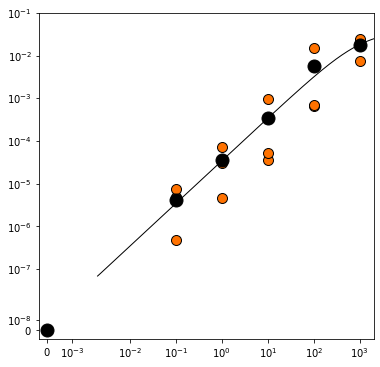

15
[0.022621828829382365, 0.021153790251083583, 0.023966367767666294, 0.01830277901838896, 0.02432809078127024, 0.06481129526257219]
[295.8464247541503, 667.4305472254231, 265.2777078263464, 199.53389892243837, 303.88727621459213, 2824.529915253317]
Cboot
mean
0.029197358651727272
median
0.02329409829852433
sd
0.016052279000151375
95% CI
-0.004634942876048542
0.03645679640388512
IQR
-0.001773298402866049
0.0009435617293449237
Kboot
mean
759.4176283660445
median
299.8668504843712
sd
935.6994348850864
95% CI
-92.1149754489443
2255.025643765459
IQR
-26.946963426073808
276.6778789883441


C:\Users\Angelina\Anaconda3\envs\cf\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


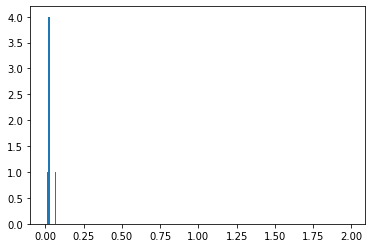

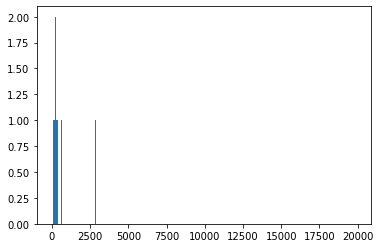

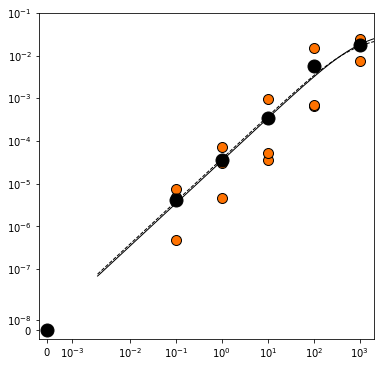

In [69]:
#fit to + linear DNA sample

sample='A ext'
color='#3a3a3a'

p0=[.09, 1800]

x_array=[]
y_array=[]
for rep in ['tf1', 'tf2', 'tf3', 'tf4', 'tf5']:
    x=np.array(df.loc[df['sample']==sample, 'pM DNA'])
    y=np.array(df.loc[df['sample']==sample, rep])
    for x_val, y_val in zip(x, y):
        if (y_val>0) and (x_val>0):
            x_array.append(x_val)
            y_array.append(y_val)
print(x_array)
print(y_array)


xlog=np.log(x_array)
ylog=np.log(y_array)

print(xlog)
print(ylog)

#minimize log transformed l2 cost fxn
output=minimize(test_l2_cost_fxn, p0, args=(xlog, ylog), method='Nelder-mead')
params=output.x
print(output)

fig, ax=plt.subplots(figsize=(6,6))#, dpi=300)
ms=10
color=darks[0]

ax.plot(x_array, y_array, 'o', color=color, mec='black', markersize=ms, linewidth=2) #plot all points
x_mean=np.array(df.loc[df['sample']==sample, 'pM DNA'])
y_mean=np.array(df.loc[df['sample']==sample, 'average'])
ax.plot(x_mean, y_mean, 'o', ms=ms*1.3, color='black') #plot all means

x=10**np.linspace(-2.7, 3.5, 300)
ax.plot(x, fit_fxn(x, *params), '-', color='black', lw=1) #plot l1 fit

ax.set_xscale('symlog', linthreshx=2e-3, lw=10)
ax.set_yscale('symlog', linthreshy=5e-8, lw=10)
ax.set_ylim(-1e-8, 1e-1)
ax.set_xlim(-3e-4, 2e3)

plt.show()
plt.close()
    

    
#bootstrapping
print(len(y_array))
Cboot=[]
Kboot=[]
for no in range(10):
    bootx=[]
    booty=[]
    for i in range(len(y_array)):
        idx=np.random.randint(len(y_array))
        bootx.append(x_array[idx])
        booty.append(y_array[idx])
    #log transforms bootx and booty
    bootxlog=np.log(bootx)
    bootylog=np.log(booty)
    #minimize l2 for log transformed 
    output=minimize(test_l2_cost_fxn, p0, args=(bootxlog, bootylog), method='Nelder-mead')
    bootparams=output.x
#     print(output)
    
    if output.success==True:
        Cboot.append(bootparams[0])
        Kboot.append(bootparams[1])

print(Cboot)
print(Kboot)
print('Cboot')
print('mean')
print(np.mean(Cboot))
print('median')
print(np.median(Cboot))
print('sd')
print(np.std(Cboot))
print('95% CI')
print(np.percentile(Cboot, 2.5)-np.percentile(Cboot, 50))
print(np.percentile(Cboot, 97.5)-np.percentile(Cboot, 50))
print('IQR')
print(np.percentile(Cboot, 25)-np.median(Cboot))
print(np.percentile(Cboot, 75)-np.median(Cboot))

print('Kboot')
print('mean')
print(np.mean(Kboot))
print('median')
print(np.median(Kboot))
print('sd')
print(np.std(Kboot))
print('95% CI')
print(np.percentile(Kboot, 2.5)-np.percentile(Kboot, 50))
print(np.percentile(Kboot, 97.5)-np.percentile(Kboot, 50))
print('IQR')
print(np.percentile(Kboot, 25)-np.median(Kboot))
print(np.percentile(Kboot, 75)-np.median(Kboot))

fig, ax=plt.subplots()
ax.hist(Cboot, bins=np.arange(0, 2, .01))

fig, ax=plt.subplots()
ax.hist(Kboot, bins=np.arange(0, 20000, 100))

fig, ax=plt.subplots(figsize=(6,6))#, dpi=300)
ax.plot(x_array, y_array, 'o', color=color, mec='black', markersize=ms, linewidth=2) #plot all points
ax.plot(x_mean, y_mean, 'o', ms=ms*1.3, color='black') #plot all means
ax.plot(x, fit_fxn(x, *params), '-', color='black', lw=1) #plot manual fit
ax.plot(x, fit_fxn(x, np.mean(Cboot), np.mean(Kboot)), '--', color='black', lw=1) #plot manual fit

ax.set_xscale('symlog', linthreshx=2e-3, lw=10)
ax.set_yscale('symlog', linthreshy=5e-8, lw=10)
ax.set_ylim(-1e-8, 1e-1)
ax.set_xlim(-3e-4, 2e3)

plt.show()
plt.close()

    

[1000.0, 100.0, 10.0, 1.0, 0.1, 0.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.0]
[0.023333332999999998, 0.0050526320000000005, 0.00025, 3.03448e-05, 4.5e-06, 0.0, 0.04516129, 0.013269231000000001, 0.001098765, 9.069770000000001e-05, 7.346939999999999e-06, 0.0, 0.012380951999999999, 0.0028125, 0.000430435, 2.33333e-05, 1.8181799999999999e-06, 0.0, 0.0087, 0.0181, 0.004379999999999999, 0.000197, 2.26e-05, 0.0, 0.012473118, 0.0017093020000000002, 0.000247525, 1.41593e-05, 1.7829499999999998e-06, 0.0]
30
[1000.0, 1.0, 0.1, 0.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.0, 100.0, 10.0]
[0.021153846, 3.09735e-05, 4.78448e-06, 0.0, 0.024375, 0.015344828000000001, 0.0009672130000000001, 7.14286e-05, 7.4193499999999995e-06, 0.0, 0.007631579, 0.0006736839999999999, 3.63636e-05, 4.6789e-06, 4.81928e-07, 0.0, 0.0006940000000000001, 5.3299999999999995e-05]
18


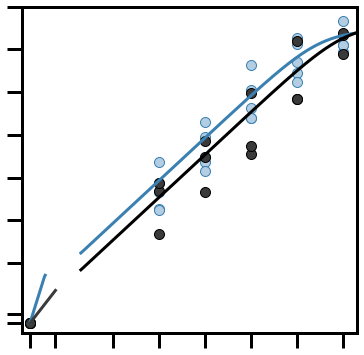

In [71]:
#generates plot shown in 2d based on fitting in previous two cells
#new fits, plot

sample='pAN422'
x_array=[]
y_array=[]
for rep in ['tf1', 'tf2', 'tf3', 'tf4', 'tf5']:
    x=np.array(df.loc[df['sample']==sample, 'pM DNA'])
    y=np.array(df.loc[df['sample']==sample, rep])
    for x_val, y_val in zip(x, y):
        if y_val>=0:
            x_array.append(x_val)
            y_array.append(y_val)
print(x_array)
print(y_array)
print(len(y_array))

            
            
sample2='A ext'
color2='#3a3a3a'
x2_array=[]
y2_array=[]
for rep in ['tf1', 'tf2', 'tf3', 'tf4', 'tf5']:
    x=np.array(df.loc[df['sample']==sample2, 'pM DNA'])
    y=np.array(df.loc[df['sample']==sample2, rep])
    for x_val, y_val in zip(x, y):
        if y_val>=0:
            x2_array.append(x_val)
            y2_array.append(y_val)
print(x2_array)
print(y2_array)
print(len(y2_array))


params=[2.82877684e-02, 3.29211739e+02]
params2=[3.84037908e-02, 1.10983224e+03]

fig, ax=plt.subplots(figsize=(6,6))#, dpi=300)
ms=10
ax.plot(x_array, y_array, 'o', ms=ms, color=pastels[3], lw=3, mec=darks[3])
ax.plot(x2_array, y2_array, 'o', ms=ms, color=color2, lw=3, mec='k')

x=10**np.linspace(-2.7, 3.5, 300)

ax.plot(x, fit_fxn(x, *params), color=darks[3], lw=3)
ax.plot(x, fit_fxn(x, *params2), color='black', lw=3)
# ax.plot(x, fit_fxn(x, *params2), '--', color=color)


ax.set_xscale('symlog', linthreshx=2e-3, lw=10)
ax.set_yscale('symlog', linthreshy=5e-8, lw=10)
ax.set_ylim(-1e-8, 1e-1)
ax.set_xlim(-3e-4, 2e3)
ax.set_xticklabels([])
ax.set_yticklabels([])

# ax2=ax.twiny()
x=np.linspace(0, 6e-4, 20)
x2=np.linspace(0, 1e-3, 20)
ax.plot(x, fit_fxn(x, *params), color=darks[3], lw=3)
ax.plot(x2, fit_fxn(x2, *params2), color=color2, lw=3)
# ax2.set_xlim(1e-4, 2e2)
# ax2.set_xscale('log')

ax.tick_params(which='major', direction='out', length=15, width=3)
ax.tick_params(which='minor', direction='out', length=0, width=2)


for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color('black')
# ax.tick_params(axis='both', which='major', labelsize=32)


plt.show()
plt.tight_layout()
# fig.savefig('newfit_lin_plas.pdf', bbox_inches='tight')
plt.close()